# ⚠️ Warning!

*   **ห้าม run all**
*   **ห้าม save ไฟล์ .npy (ใน code cell สุดท้าย) ทับไฟล์เดิมในโฟร์เดอร์ classfication ball ที่คอปแชร์ไว้**



# Import Data from Kaggle
ดาวน์โหลดข้อมูลจาก Kaggle

ต้องมีไฟล์ kaggle.json (Kaggle API Token) ใน session
storage เพื่อรัน section นี้

In [ ]:
! pip install kaggle
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=c46006700a2a34d546fec7faa904e219dac804d3a4beb785b36e115673bf6673
  Stored in directory: C:\Users\Admin\AppData\Local\Temp\pip-ephem-wheel-cache-egqvgcel\wheels\93\6e\87\6d3385c22c1284be8161dfa643c4a58009b8ee4f0ea9ca54ff
Successfully built kaggle


In [38]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/sports-balls-multiclass-image-classification")

print("Path to dataset files:", path)

c:\Users\Admin\miniconda3\envs\analysisenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 401M/401M [00:21<00:00, 19.7MB/s] 

Extracting files...


Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\samuelcortinhas\sports-balls-multiclass-image-classification\versions\2


# Prepare Data

In [31]:
import pandas as pd
import numpy as np
import cv2

import os

from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
pwd

'c:\\Users\\Admin\\Desktop\\Sportball'

In [69]:
label = []
dataset = []
filepaths = []
for ball in os.listdir(f"C:\\Users\\Admin\\Desktop\\Sportball\\dataset\\train"):
    for filepath in os.listdir(f"dataset/train/{ball}"):
        label.append(ball)
        dataset.append("train")
        filepaths.append(f"dataset/train/{ball}/{filepath}")

for ball in os.listdir(f"C:\\Users\\Admin\\Desktop\\Sportball\\dataset\\test"):
    for filepath in os.listdir(f"dataset/test/{ball}"):
        label.append(ball)
        dataset.append("test")
        filepaths.append(f"dataset/test/{ball}/{filepath}")

pd.DataFrame({"filepath": filepaths, "dataset": dataset, "labels": label}).to_csv("ball.csv", index=False)

In [70]:
# อ่านไฟล์ metadata
balls = pd.read_csv('ball.csv')
balls

,filepath,dataset,labels
0,dataset/train/american_football/american_footb...,train,american_football
1,dataset/train/american_football/american_footb...,train,american_football
2,dataset/train/american_football/american_footb...,train,american_football
3,dataset/train/american_football/american_footb...,train,american_football
4,dataset/train/american_football/american_footb...,train,american_football
...,...,...,...
9164,dataset/test/volleyball/volleyball_867.jpg,test,volleyball
9165,dataset/test/volleyball/volleyball_868.jpg,test,volleyball
9166,dataset/test/volleyball/volleyball_882.jpg,test,volleyball
9167,dataset/test/volleyball/volleyball_9.jpg,test,volleyball


In [94]:
# เลือกเฉพาะ 11 classes ที่เป็น sport balls
selected_labels = ['baseball','basketball','beachballs','billiard_ball',
                   'bowling_ball','cricket_ball','football','golf_ball',
                   'stable_tennis_ball','tennis_ball', 'volleyball',
]
sport_balls = balls[(balls['labels'].isin(selected_labels))]

In [95]:
# สร้าง df ที่เป็น metadata ของ train, validate, test
sport_balls_train = sport_balls[(sport_balls['dataset']) == 'train'].reset_index(drop=True)
sport_balls_validate = sport_balls[(sport_balls['dataset']) == 'valid'].reset_index(drop=True)
sport_balls_test = sport_balls[(sport_balls['dataset']) == 'test'].reset_index(drop=True)

In [96]:
# อ่านข้อมูลรูปภาพชุด train แล้วเก็บเป็น array
train_X = []
for i in range(sport_balls_train.shape[0]):
  img = cv2.imread(sport_balls_train.iloc[i,0])
  img = cv2.resize(img, (224,224))
  train_X.append(img)
train_X = np.array(train_X)

In [97]:
# อ่านข้อมูลรูปภาพชุด test แล้วเก็บเป็น array
test_X = []
for i in range(sport_balls_test.shape[0]):
  img = cv2.imread(sport_balls_test.iloc[i,0])
  img = cv2.resize(img, (224,224))
  test_X.append(img)
test_X = np.array(test_X)

In [98]:
test_X.shape

(1126, 224, 224, 3)

In [100]:
# เก็บ labels ของรูปภาพของ train, validate, test เป็น array
train_Y = sport_balls_train['labels'].to_numpy().astype('str')
test_Y = sport_balls_test['labels'].to_numpy().astype('str')

In [101]:
# บันทึกข้อมูลเป็นไฟล์ .npy สำหรับใช้งานในขั้นตอนต่อ ๆ ไป
np.save('train_X.npy', train_X)
np.save('train_Y.npy', train_Y)
np.save('test_X.npy', test_X)
np.save('test_Y.npy', test_Y)

# Explore Data

In [102]:
import seaborn as sns
import matplotlib.pylab as plt

Text(0.5, 1.0, 'Training Data')

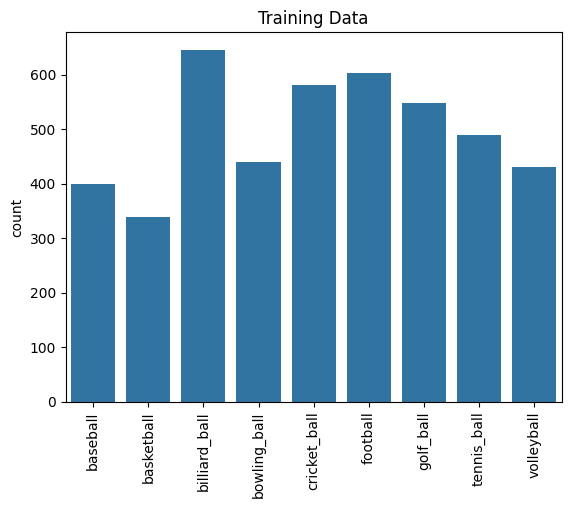

In [103]:
g = sns.countplot(x=train_Y)
plt.xticks(rotation=90)
plt.title('Training Data')

Text(0.5, 1.0, 'Testing Data')

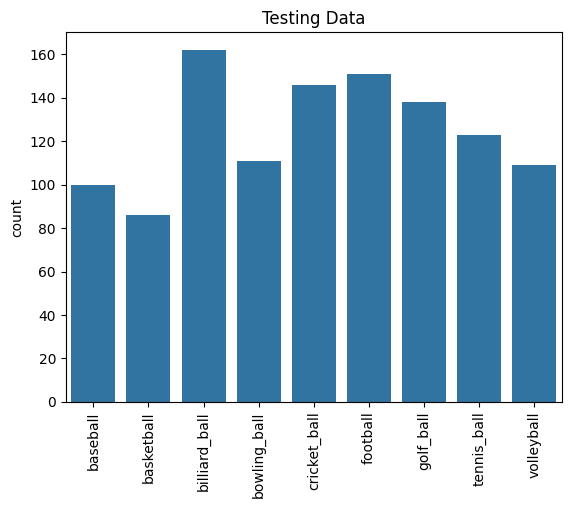

In [105]:
g = sns.countplot(x=test_Y)
plt.xticks(rotation=90)
plt.title('Testing Data')